### Title: Analyzing The Relationship Between Cryptocurrencies and Inflation

**Team Members Names:**  Eshan Kaul
    
**Team Members PID:**  eshankaul

**Team Name:**  Dabbling In Debt
    

We have all heard the countless Bitcoin backers claiming that Bitcoin is a bullet-proof hedge against inflation and is the best way to protect long-term wealth, and recently many established financial institutions have also been hoping onto this bandwagon. Their argument is simple. Bitcoin, unlike normal fiat currencies, has a limited, predetermined supply of coins that can be entered into circulation. This means that governments or central banks can not devalue the currency by increasing the supply. This limited quantity attribute has resulted in many individual and institutional investors liking bitcoin to gold which used to be believed as a hedge against the dollar. 

The goal of this project is to determine if there is any validity to the argument that cryptocurrencies can be used as a hedge against inflation. Are cryptocurrencies really a good method of protecting wealth from inflation and if so, do all cryptocurrencies work, or are specific currencies that work better than others. These questions are motivated by the larger questions of how does adjusting the money supply while maintaining the monetary base affects the greater economy, but for the purposes of this project, we will focus on tackling the more specific questions of what are the relationships between crypto and inflation?

To address this issue we would like to collect relevant data on historical and current inflation rates along with data on the price patterns of at least one type of fixed supply cryptocurrency and one type of cryptocurrency with a flexible supply. 

The analysis will be broken down into two parts. The first part will compare the current/previous relationship between cryptocurrencies and inflation rates. The second part will then be to develop a model to estimate the future trends of cryptocurrencies and inflation rates to explore how the two might vary in the future. 

In [ ]:
from google.colab import files
uploaded = files.upload()

In [1]:
import pandas as pd
import numpy as np
import requests 
import pandas_datareader as pdr
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.formula.api as smf
from bs4 import BeautifulSoup
import time 
import ssl
import json
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

### Reading in Federal Reserve Data

The following data is retrieved from https://fred.stlouisfed.org/. This website is the online database for the Federal Reserve Economic Data and is used to gather the inflation data, along with any other relevant inflationary metrics. The data is downloaded directly from the FRED website in CSV format, and simple scripts are then run to convert the data to the correct types, and rename the variables/columns for readability.  

In [2]:
#FED RESERVE DATA
Federal_Funds_Rate = pd.read_csv("Federal_Funds_Rate.csv") 
US_CPI = pd.read_csv("US_CPI.csv")
Inflation_Expectations = pd.read_csv("Inflation_Expectations.csv")
Inflation_ConsumerPrices_US = pd.read_csv("Inflation_ConsumerPricesUS.csv")
inflation = pd.read_csv("MonthlyInflation.csv", index_col = False)

print(Federal_Funds_Rate)
print(US_CPI)
print(Inflation_Expectations)
print(Inflation_ConsumerPrices_US)
print(inflation)

RemoteDataError: Unable to read URL: https://fred.stlouisfed.org/graph/fredgraph.csv?id=FFR
Response Text:
b'<!DOCTYPE html>\r\n<html lang="en">\r\n<head>\r\n    <meta charset="utf-8">\r\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n    <meta name="viewport" content="width=device-width, initial-scale=1">\r\n    <title>Error - St. Louis Fed</title>\r\n    <meta name="description" content="">\r\n    <meta name="keywords" content="">\r\n    <link rel="stylesheet" type="text/css" href="/css/bootstrap.custom.min.css?1551876305">\r\n    <link rel="stylesheet" type="text/css" href="/css/home.min.css?1553087253">\r\n    <link rel="stylesheet" type="text/css" href="/assets/fontawesome-free/css/all.min.css">\r\n    <link rel="stylesheet" type="text/css" href="/assets/select2/dist/css/select2.min.css">\r\n    <style>p {\r\n        margin-bottom: 1.5em;\r\n    }</style>\r\n</head>\r\n<body>\r\n<link rel="preconnect" href="https://fonts.gstatic.com">\n<link href="https://fonts.googleapis.com/css2?family=Roboto&display=swap" rel="stylesheet">\n<link href="https://fonts.googleapis.com/css2?family=Roboto+Slab&display=swap" rel="stylesheet">\n<!--googleoff: snippet-->\n<a href="#content-container" class="sr-only sr-only-focusable">Skip to main content</a>\n<!--googleon: snippet-->\n<a name="top" id="top"></a>\n<!--[if lt IE 7 ]>\n<div id="container" class="ie6 container"><![endif]-->\n<!--[if IE 7 ]>\n<div id="container" class="ie7 container"><![endif]-->\n<!--[if IE 8 ]>\n<div id="container" class="ie8 container"><![endif]-->\n<!--[if IE 9 ]>\n<div id="container" class="ie9 container"><![endif]-->\n<!--[if IE]>\n<div id="container" class="ie container"><![endif]-->\n<!--[if !(IE)]><!-->\n<div id="container" class="container">\n  <!--<![endif]-->\n  <span class="EL-header-and-subheader">\n    <div class="header-not-home EL-nonhomepage-header">\n            <div id="hidden-user" class=\'hide\'></div>\n            <div id="action-modal"></div>\n            <div class=\'col-xs-12 center-content\' style="padding: 0px; height: inherit;">\n                <div class="col-md-4 col-xs-3" style="padding-left: 15px; padding-right: 15px;">\n                    <a class="research-logo-gtm" target="_" href="//research.stlouisfed.org/">\n                        <img class="header-logo-eagle hidden-sm hidden-xs" src="//fred.stlouisfed.org/images/masthead-no-bank.png" alt="Eagle Economic Research Logo">\n                        <img class="header-logo-eagle visible-sm-block visible-xs-block" src="//fred.stlouisfed.org/images/logo-eagle.png" alt="Eagle Logo">\n                    </a>\n                </div>\n                <div class="fred-logo-div col-xs-6 visible-sm-block visible-xs-block" style="padding-left: 15px; padding-right: 15px;">\n                    <a class="fred-logo-gtm" href="//fred.stlouisfed.org/">\n                        <picture>\n                            <img class="header-logo" src="//fred.stlouisfed.org/images/fred-masthead-mobile-2x.png" alt="mini fred logo">\n                        </picture>\n                    </a>\n                </div>\n                <div class="col-md-8 col-xs-3" style="padding-left: 15px; padding-right: 0px;">\n                    <ul id="blueheader-navbar" class="nav pull-right navbar-nav">\n                        <li class="blueheader-navbar-item center-content-vertically hidden-sm hidden-xs">\n                            <a class="research-resources-dropdown-gtm header-popover research-resources-popover-container" href="#">\n    <span id="research-resources-link" class="align-icon">Economic Research Resources\n        <i class="fas fa-angle-down fa-lg header-icon-padding" alt="Open Research Resources Menu Icon"></i>\n    </span>\n</a>\n\n<div id="research-resources-popover" class="hide">\n    <div class="col-xs-12 research-resources">\n        <div class="col-xs-7 research-resources-left-column">\n            <div class="research-resources-text">Explore resources provided by the Research Division at the Federal Reserve Bank of St. Louis</div>\n            <div>\n                <a rel="noopener" target="_blank" class="errd-research-link-gtm" href="https://research.stlouisfed.org" style="color: #364E71; font-family: Roboto; font-weight: 700px">research.stlouisfed.org <i class="fas fa-external-link-alt" aria-hidden="true" style="font-size: 12px"></i></a>\n            </div>\n        </div>\n        <div class="col-xs-5 research-resources-right-column">\n            <ul class="header-list-popover list-group flush-list">\n                <li class="list-group-item">\n                    <a rel="noopener" target="_blank" class="errd-research-news-gtm" href="https://research.stlouisfed.org/publications/research-news/">Research News</a>\n                </li>\n                <li class="list-group-item">\n                    <a rel="noopener" target="_blank" class="errd-economists-gtm" href="https://research.stlouisfed.org/econ/">Economists</a>\n                </li>\n                <li class="list-group-item">\n                    <a rel="noopener" target="_blank" class="errd-publications-gtm"  href="https://research.stlouisfed.org/publications/">Publications</a>\n                </li>\n                <li class="list-group-item">\n                    <a rel="noopener" target="_blank" class="errd-working-papers-gtm" href="https://research.stlouisfed.org/wp/">Working Papers</a>\n                </li>\n                <li class="list-group-item">\n                    <a rel="noopener" target="_blank" class="errd-info-services-gtm" href="https://research.stlouisfed.org/info-services.html">Information Services</a>\n                </li>\n            </ul>\n        </div>\n    </div>\n</div>\n                        </li>\n                        <li class="blueheader-navbar-item center-content-vertically hidden-sm hidden-xs">\n                            <a class="Switch-Products-gtm header-popover switchprod-popover-container" href="#">\n  <span id="switchProd" class="align-icon"> Switch Products\n    <i class="fas fa-angle-down fa-lg header-icon-padding" alt="Open Switch Products Menu Icon"></i>\n  </span>\n</a>\n\n<div id="switchprod-popover" class="hide">\n  <ul id="switch-prod-list" class="list-group switch-products-list col-xs-12" role="menu" aria-labelledby="switchProduct">\n    <li id="ham-fred-dev" class="list-group-item product-fred">\n        <a class="burger-fred-gtm" role="menuitem" tabindex="-1" href="//fred.stlouisfed.org">\n            <span class="fred-ultra-selected fred-ultra burger-fred-gtm">FRED</span>\n            <span class="pull-right switch-icon-padding burger-fred-gtm"><img src="//fred.stlouisfed.org/images/favicon.ico" alt="" width="16" height="16"></span>\n        </a>\n      </li>\n      <li id="ham-alfred" class="hover-nav list-group-item">\n          <a rel="noopener" target="_blank" class="burger-alfred-gtm" role="menuitem" tabindex="-1" href="//alfred.stlouisfed.org">\n            <span class="fred-thin burger-alfred-gtm">AL</span>\n            <span class="fred-ultra burger-alfred-gtm">FRED</span>\n            <span class="pull-right switch-icon-padding burger-alfred-gtm"><img src="//fred.stlouisfed.org/images/greyRect.png" alt="" width="16" height="16"></span>\n        </a>\n      </li>\n      <li id="ham-geofred" class="hover-nav list-group-item">\n          <a rel="noopener" target="_blank" class="burger-geofred-gtm" role="menuitem" tabindex="-1" href="//geofred.stlouisfed.org">\n            <span class="fred-thin burger-geofred-gtm">GEO</span>\n            <span class="fred-ultra burger-geofred-gtm">FRED</span>\n            <span class="pull-right switch-icon-padding burger-geofred-gtm"><img src="//fred.stlouisfed.org/images/greyRect.png" alt="" width="16" height="16" onerror="this.src=\'https://fred.stlouisfed.org/images/favicons/favicon-16x16.png\'"></span>\n        </a>\n      </li>\n      <li id="ham-fraser" class="hover-nav list-group-item">\n          <a rel="noopener" target="_blank" class="burger-fraser-gtm" role="menuitem" tabindex="-1" href="https://fraser.stlouisfed.org/">\n            <span class="fred-ultra burger-fraser-gtm">FRASER</span>\n            <span class="pull-right switch-icon-padding burger-fraser-gtm"><img src="//fred.stlouisfed.org/images/greyRect.png" alt="" width="16" height="16" onerror="this.src=\'https://fred.stlouisfed.org/images/favicons/favicon-16x16.png\'"></span>\n        </a>\n      </li>\n      <li id="ham-ecolowdown" class="hover-nav-econ hover-nav list-group-item">\n          <a rel="noopener" target="_blank" class="burger-econlowdown-gtm" role="menuitem" tabindex="-1" href="https://www.econlowdown.org/">\n            <span class="fred-ultra-econ burger-econlowdown-gtm">ECON<br>LOWDOWN</span>\n            <span class="pull-right burger-econlowdown-gtm" style="padding-top: 15px"><img src="//fred.stlouisfed.org/images/greyRect.png" alt="" width="16" height="16" onerror="this.src=\'https://fred.stlouisfed.org/images/favicons/favicon-16x16.png\'"></span>\n        </a>\n    </li>\n</ul>\n</div>                        </li>\n                        <li class="blueheader-navbar-item center-content-vertically hidden-sm hidden-xs">\n                            <div class="hidden-xs" id="signin-wrap">\n                                <div id="user-nav" class="EL-my-account-link"></div>\n                            </div>\n                        </li>\n                        <li class="blueheader-navbar-item center-content-vertically visible-sm-block visible-xs-block">\n                            <a class="hamburger-popover-container header-popover hamburger-gtm" href="#">\n    <i id="hamburger" class="fas fa-bars hamburger-header" alt="Open Mobile Hamburger Menu"></i>\n</a>\n\n<div id="hamburger-popover" class="hide">\n    <div class="hamburger-search-padding">\n        <div class=\'input-group\'>\n            <input type="text" class="form-control search-input nav-search" placeholder="Search FRED data...">\n            <span class="input-group-btn">\n                <button class="btn search-submit nav-search-button" type="submit">\n                    <i class="fa fa-search" alt="Submit Mobile Hamburger Search"></i>\n                </button>\n            </span>\n        </div>\n    </div>\n    <div id="hamburger-navigation">\n        <div id="hamburger-home">\n            <ul class="list-group flush-list hamburger-list col-xs-12">\n                <li class="list-group-item">\n                    <a class="burger-calendar-gtm" href="https://fred.stlouisfed.org/releases/calendar">Release Calendar</a>\n                </li>\n                <li class="list-group-item hamburger-menu-item" onclick="hamburgerMenuNavigation(\'hamburger-tools\')">\n                    <a class="burger-tools-gtm" href="#">FRED Tools\n                        <i class="fas fa-angle-right hamburger-nxt-page-icon" alt="FRED Tools Hamburger Submenu Icon"></i>\n                    </a>\n                </li>\n                <li class="list-group-item">\n                    <a class="burger-blog-gtm" href="https://fredblog.stlouisfed.org">FRED Blog</a>\n                </li>\n                <li class="list-group-item">\n                    <a class="burger-news-gtm" href="https://news.research.stlouisfed.org/category/fred-announcements/">FRED News</a>\n                </li>\n                <li class="list-group-item hamburger-menu-item" onclick="hamburgerMenuNavigation(\'hamburger-about-fred\')">\n                    <a class="burger-about-gtm" href="#">About FRED\n                        <i class="fas fa-angle-right hamburger-nxt-page-icon" alt="About FRED Hamburger Submenu Icon"></i>\n                    </a>\n                </li>\n                <li class="list-group-item">\n                    <a class="burger-myaccount-gtm" href="https://fredaccount.stlouisfed.org">My Account</a>\n                </li>\n            </ul>\n            <ul class="list-group flush-list hamburger-list col-xs-12">\n                <li class="list-group-item hamburger-menu-item" onclick="hamburgerMenuNavigation(\'hamburger-products\')">\n                    <a class="burger-switch-gtm" href="#">\n                        Switch Products<i class="fas fa-angle-right hamburger-nxt-page-icon" alt="Switch Products Hamburger Submenu Icon"></i>\n                    </a>\n                </li>\n                <li class="list-group-item hamburger-menu-item" onclick="hamburgerMenuNavigation(\'hamburger-research\')">\n                    <a class="burger-resources-gtm" href="#">\n                        Economic Research Resources<i class="fas fa-angle-right hamburger-nxt-page-icon" alt="Economic Research Resources Hamburger Submenu Icon"></i>\n                    </a>\n                    <p>Explore resources provided by the Research Division at the Federal Reserve Bank of St. Louis.</p>\n                </li>\n            </ui>\n        </div>\n        \n        <div id="hamburger-about-fred" class="hide">\n            <ul class="list-group hamburger-submenu-list col-xs-12">\n                <li class="list-group-item hamburger-menu-item" onclick="hamburgerMenuNavigation(\'hamburger-home\')">\n                    <i class="fas fa-angle-left hamburger-previous-page-icon" alt="Return to Mobile/Hamburger Main Menu Icon"></i>\n                    About FRED\n                </li>\n                <li class="list-group-item">\n                    <a class="burger-fred-about-gtm" href="https://fredhelp.stlouisfed.org/fred/about/about-fred/what-is-fred/"> What is FRED</a>\n                </li>\n                <li class="list-group-item">\n                    <a class="burger-tutorials-gtm" href="https://fredhelp.stlouisfed.org"> Tutorials</a>\n                </li>\n                <li class="list-group-item">\n                    <a class="burger-data-literacy-gtm" href="https://research.stlouisfed.org/info-services/data-literacy-for-librarians/ ">\n                      Data Literacy\n                    </a>\n                </li>\n                <li class="list-group-item">\n                    <a class="burger-contact-us-gtm" href="https://fred.stlouisfed.org/contactus/"> Contact Us</a>\n                </li>\n            </ul>\n        </div>\n        \n        <div id="hamburger-tools" class="hide">\n            <ul class="list-group hamburger-submenu-list col-xs-12">\n                <li class="list-group-item hamburger-menu-item" onclick="hamburgerMenuNavigation(\'hamburger-home\')">\n                        <i class="fas fa-angle-left hamburger-previous-page-icon" alt="Return to Mobile/Hamburger Main Menu Icon"></i>\n                        FRED Tools\n                </li>\n                <li class="list-group-item">\n                    <a class="burger-fred-excel-add-in-gtm" href="https://fred.stlouisfed.org/fred-addin"> FRED Add-in for Excel</a>\n                </li>\n                <li class="list-group-item">\n                    <a class="burger-fred-api-gtm" href="https://fred.stlouisfed.org/docs/api/fred"> FRED API</a>\n                </li>\n                <li class="list-group-item">\n                    <a class="burger-fred-mobile-apps-gtm" href="https://fred.stlouisfed.org/fred-mobile"> FRED Mobile Apps</a>\n                </li>\n            </ul>\n        </div>\n        \n        <div id="hamburger-research" class="hide">\n            <ul class="list-group hamburger-submenu-list col-xs-12">\n                <li class="list-group-item hamburger-menu-item" onclick="hamburgerMenuNavigation(\'hamburger-home\')">\n                    <span>\n                        <i class="fas fa-angle-left hamburger-previous-page-icon" alt="Return to Mobile/Hamburger Main Menu Icon"></i>\n                        Economic Research Resources\n                    </span>\n                </li>\n                <li class="list-group-item">\n                    <a rel="noopener" target="_blank" class="burger-research-news-gtm" href="https://research.stlouisfed.org/publications/research-news"> Research News</a>\n                </li>\n                <li class="list-group-item">\n                    <a rel="noopener" target="_blank" class="burger-economists-gtm" href="https://research.stlouisfed.org/econ/"> Economists</a>\n                </li>\n                <li class="list-group-item">\n                    <a rel="noopener" target="_blank" class="burger-publications-gtm" href="https://research.stlouisfed.org/publications/"> Publications</a>\n                </li>\n                <li class="list-group-item">\n                    <a rel="noopener" target="_blank" class="burger-working-papers-gtm" href="https://research.stlouisfed.org/wp/"> Working Papers</a>\n                </li>\n                <li class="list-group-item">\n                    <a rel="noopener" target="_blank" class="burger-info-services-gtm" href="https://research.stlouisfed.org/info-services.html"> Information Services</a>\n                </li>\n            </ul>\n        </div>\n        \n        <div id="hamburger-products" class="hide">\n            <ul class="list-group hamburger-submenu-list col-xs-12" style="padding-bottom: 0px !important">\n                <li class="list-group-item hamburger-menu-item" onclick="hamburgerMenuNavigation(\'hamburger-home\')">\n                        <i class="fas fa-angle-left hamburger-previous-page-icon" alt="Return to Mobile/Hamburger Main Menu Icon"></i>\n                        Switch Products\n                </li>\n            </ul>\n            <ul id="switch-prod-list" class="list-group switch-products-list col-xs-12" role="menu" aria-labelledby="switchProduct">\n    <li id="ham-fred-dev" class="list-group-item product-fred">\n        <a class="burger-fred-gtm" role="menuitem" tabindex="-1" href="//fred.stlouisfed.org">\n            <span class="fred-ultra-selected fred-ultra burger-fred-gtm">FRED</span>\n            <span class="pull-right switch-icon-padding burger-fred-gtm"><img src="//fred.stlouisfed.org/images/favicon.ico" alt="" width="16" height="16"></span>\n        </a>\n      </li>\n      <li id="ham-alfred" class="hover-nav list-group-item">\n          <a rel="noopener" target="_blank" class="burger-alfred-gtm" role="menuitem" tabindex="-1" href="//alfred.stlouisfed.org">\n            <span class="fred-thin burger-alfred-gtm">AL</span>\n            <span class="fred-ultra burger-alfred-gtm">FRED</span>\n            <span class="pull-right switch-icon-padding burger-alfred-gtm"><img src="//fred.stlouisfed.org/images/greyRect.png" alt="" width="16" height="16"></span>\n        </a>\n      </li>\n      <li id="ham-geofred" class="hover-nav list-group-item">\n          <a rel="noopener" target="_blank" class="burger-geofred-gtm" role="menuitem" tabindex="-1" href="//geofred.stlouisfed.org">\n            <span class="fred-thin burger-geofred-gtm">GEO</span>\n            <span class="fred-ultra burger-geofred-gtm">FRED</span>\n            <span class="pull-right switch-icon-padding burger-geofred-gtm"><img src="//fred.stlouisfed.org/images/greyRect.png" alt="" width="16" height="16" onerror="this.src=\'https://fred.stlouisfed.org/images/favicons/favicon-16x16.png\'"></span>\n        </a>\n      </li>\n      <li id="ham-fraser" class="hover-nav list-group-item">\n          <a rel="noopener" target="_blank" class="burger-fraser-gtm" role="menuitem" tabindex="-1" href="https://fraser.stlouisfed.org/">\n            <span class="fred-ultra burger-fraser-gtm">FRASER</span>\n            <span class="pull-right switch-icon-padding burger-fraser-gtm"><img src="//fred.stlouisfed.org/images/greyRect.png" alt="" width="16" height="16" onerror="this.src=\'https://fred.stlouisfed.org/images/favicons/favicon-16x16.png\'"></span>\n        </a>\n      </li>\n      <li id="ham-ecolowdown" class="hover-nav-econ hover-nav list-group-item">\n          <a rel="noopener" target="_blank" class="burger-econlowdown-gtm" role="menuitem" tabindex="-1" href="https://www.econlowdown.org/">\n            <span class="fred-ultra-econ burger-econlowdown-gtm">ECON<br>LOWDOWN</span>\n            <span class="pull-right burger-econlowdown-gtm" style="padding-top: 15px"><img src="//fred.stlouisfed.org/images/greyRect.png" alt="" width="16" height="16" onerror="this.src=\'https://fred.stlouisfed.org/images/favicons/favicon-16x16.png\'"></span>\n        </a>\n    </li>\n</ul>\n        </div>\n    </div>\n</div>\n                        </li>\n                    </ul>\n                </div>\n            </div>\n        <div id="notifications-container"></div>\n\n    </div>\n    <div class=\'sub-header center-content col-md-12 hidden-sm hidden-xs\'>\n      <div class="col-lg-3 col-md-3" style="padding-left: 15px; padding-right: 15px;" >\n          <a class="fred-logo-gtm" href="//fred.stlouisfed.org/">\n                <img id="fred-logo-subheader" src="//fred.stlouisfed.org/images/fred-logo-2x.png" alt="fred subheader logo">\n          </a>\n      </div>\n      <div class="col-lg-2 fred-trust-text center-content-vertically hidden-md hidden-sm hidden-xs">\n            Your trusted data source since 1991.\n      </div>\n      <div class="col-lg-7 col-md-9 hidden-sm hidden-xs" style="padding-left: 15px; padding-right: 15px;">\n          <div class="search-header-div pull-right col-xs-8 hidden-sm hidden-xs">\n              <div class=\'input-group EL-header-search-container\' id="search-container-header">\n                  <select id="head-search" class=\'EL-header-search\'>\n                      <option></option>\n                  </select>\n                  <input type="hidden" name="st" class="search-text-input">\n                  <span class="input-group-btn">\n                    <button class="btn search-submit-select2" id="select2-nav-search-button" type="submit">\n                        <i class="fa fa-search"></i>\n                    </button>\n                  </span>\n              </div>\n          </div>\n\n          <nav class="col-xs-12 navbar hidden-sm hidden-xs EL-main-nav" id="subheader-nav" role="navigation">\n    <div class="navbar-padding navbar-collapse collapse">\n        <ul id="subheader-navbar" class="nav pull-right navbar-nav">\n            <li class="nav-li-subheader">\n                <a href="https://fred.stlouisfed.org/releases/calendar" class="nav-releasecal-subheader-gtm">Release Calendar</a>\n            </li>\n            <li class="nav-li-subheader">\n              <a class="sub-header-nav-tools-gtm  header-popover fred-tools-container" href="#">\n  <span id="fred-tools-link" class="align-icon">FRED Tools\n    <i class="fas fa-angle-down header-icon-padding" alt="Open FRED Tools Menu Icon"></i>\n  </span>\n</a>\n\n<div id="fred-tools-popover" class="hide">\n  <ul class="header-list-popover list-group flush-list">\n    <li class="list-group-item">\n      <a class="homepage-nav-tools-fred-excel-addin-gtm" href="https://fred.stlouisfed.org/fred-addin">FRED Add-in for Excel</a>\n    </li>\n    <li class="list-group-item">\n      <a class="homepage-nav-tools-fred-api-gtm" href="https://fred.stlouisfed.org/docs/api/fred">FRED API</a>\n    </li>\n    <li class="list-group-item">\n      <a class="homepage-nav-tools-fred-mobile-gtm" href="https://fred.stlouisfed.org/fred-mobile">FRED Mobile Apps</a>\n    </li>\n  </ul>\n</div>\n            </li>\n            <li class="nav-li-subheader">\n                <a href="https://news.research.stlouisfed.org/category/fred-announcements/" class="nav-news-subheader-gtm">FRED News</a>\n            </li>\n            <li class="nav-li-subheader">\n                <a href="https://fredblog.stlouisfed.org/" class="nav-fredblog-subheader-gtm">FRED Blog</a>\n            </li>\n            <li class="nav-li-subheader">\n              \n<a class="subheader-nav-about-gtm header-popover about-fred-container" href="#">\n  <span id="about-fred-link" class="align-icon">About FRED\n    <i class="fas fa-angle-down header-icon-padding" alt="Open About FRED Menu Icon"></i>\n  </span>\n</a>\n\n<div id="about-fred-popover" class="hide">\n    <ul class="header-list-popover list-group flush-list">\n      <li class="list-group-item">\n        <a class="about-fred-what-is-gtm" href="https://fredhelp.stlouisfed.org/fred/about/about-fred/what-is-fred/">\n          What is FRED\n        </a>\n      </li>\n      <li class="list-group-item">\n        <a class="about-fred-tutorials-gtm" href="https://fredhelp.stlouisfed.org">\n          Tutorials\n        </a>\n      </li>\n      <li class="list-group-item">\n        <a class="about-research-data-literacy-gtm" href="https://research.stlouisfed.org/info-services/data-literacy-for-librarians/ ">\n          Data Literacy\n        </a>\n      </li>\n      <li class="list-group-item">\n        <a class="about-fred-contact-gtm" href="https://fred.stlouisfed.org/contactus/ ">\n          Contact Us\n        </a>\n      </li>\n    </ul>\n</div>\n            </li>\n        </ul>\n    </div>\n</nav>\n      </div>\n    </div>\n  </span>\n  <div style="padding-left: 10px; padding-right: 10px;" class="clear" id="content-container">\n\n    \n\r\n<!--BEGIN CONTENT-->\r\n<div class="error-container">\r\n    <h1>Looking for Something?</h1>\r\n    <p class="large">We\'re sorry, the page you were looking for cannot be found. Please feel free\r\n        to <a href="/contactus/">contact us</a> if the problem persists.</p>\r\n    <p class="large">Searching may help find what are you looking for. If all else fails, you can head\r\n        <a href="/">Home</a>\r\n    </p>\r\n    <form action="/searchresults" id="search-form-404">\r\n        <label for="search-text">Search for:</label><br>\r\n        <input type="text" name="st" id="search-text" size="50" class="form-control">\r\n        <input type="submit" class="btn btn-default" value="Search" id="404-search-button" name="404-search-button">\r\n    </form>\r\n</div>\r\n<link href="/css/footer.min.css?1553087256" rel="stylesheet" media="all">\r\n<!--END CONTENT-->\r\n    <br class="clear">\n</div>\n\n    <div id="footer" class="EL-footer hidden-print row ">\n        <a name="foot-search-a" class="xs-anchor"></a>\n       <form action="//fred.stlouisfed.org/searchresults" id="foot-search-form" class="visible-xs-block col-xs-12">\n           <div id="foot-search-container">\n               <input type="text" id="foot-search" name="st" class="js-placeholder" title="Search FRED"><button type=\'submit\' class="pull-right" id="foot-search-button">&nbsp;</button>\n           </div>\n       </form>\n\n       \n        <div class="col-xs-12 col-sm-2">\n            <ul>\n                <li class="footer-section-header">SERVICES</li>\n                <li><a href="//fred.stlouisfed.org/">FRED&reg;</a></li>\n                <li><a href="//alfred.stlouisfed.org/">ALFRED&reg;</a></li>\n                <li><a href="//geofred.stlouisfed.org">GeoFRED&reg;</a></li>\n                <li><a href="//fraser.stlouisfed.org">FRASER&reg;</a></li>\n                <li><a href="//ideas.repec.org">IDEAS</a></li>\n            </ul>\n        </div>\n\n        <div class="col-xs-12 col-sm-2 col-md-3">\n            <ul>\n                <li class="footer-section-header">RESEARCH</li>\n                <li><a href="//research.stlouisfed.org/regecon/">Eighth District Economy</a></li>\n                <li><a href="//research.stlouisfed.org/wp/">Working Papers</a></li>\n                <li><a href="//research.stlouisfed.org/conferences/">Events</a></li>\n                <li><a href="//research.stlouisfed.org/publications/">Publications</a></li>\n                <li><a href="//research.stlouisfed.org/resources.html">Other Resources</a></li>\n            </ul>\n        </div>\n\n        <div class="col-xs-12 col-sm-3">\n            <ul>\n                <li class="footer-section-header">TOOLS</li>\n                <li><a href="//fred.stlouisfed.org/fred-mobile/">FRED Mobile Apps</a></li>\n                <li><a href="//fred.stlouisfed.org/fred-addin/">FRED Add-In for Excel&reg;</a></li>\n                <li><a href="//fredhelp.stlouisfed.org/fred/graphs/share-my-fred-graph/embedded-fred-a-widget-just-for-you/">Embeddable FRED Widget</a></li>\n                <li><a href="//fred.stlouisfed.org/docs/api/fred/">Developer/APIs</a></li>\n            </ul>\n        </div>\n        <div class="col-xs-12 col-sm-2 ">\n            <ul>\n                <li class="footer-section-header">ABOUT</li>\n                <li><a href="//research.stlouisfed.org/jobopps/">Careers</a></li>\n                <li><a class="contact-hash footer-contactus-link-gtm" href="//fred.stlouisfed.org/contactus/">Contact</a></li>\n                <li><a href="//fred.stlouisfed.org/legal/">Legal</a></li>\n                <li><a href="//research.stlouisfed.org/privacy.html">Privacy Notice & Policy</a></li>\n            </ul>\n        </div>\n        <div class="col-xs-12 col-sm-3 col-md-2">\n            <ul>\n                <li class="footer-section-header">OUR SITES</li>\n                <li><a href="//www.stlouisfed.org/">St. Louis Fed</a></li>\n                <li><a href="//federalreserveonline.org">Federal Reserve System</a></li>\n                <li><a href="//research.stlouisfed.org">Research Division</a></li>\n                <li><a href="//www.stlouisfed.org/education/">Education Resources</a></li>\n            </ul>\n        </div>\n            </div>\n\n        <div class="footer2 hidden-print row EL-footer2">\n        <div class="col-xs-12 col-sm-3">\n            <h3>Need Help?</h3>\n            <div>\n                <a class="footer-questions-gtm" href="//fred.stlouisfed.org/contactus/" class="q-and-a-link-gtm">Questions or Comments</a>\n            </div>\n\n            <div style="padding: 10px 0 20px 0;">\n                <a class="footer-fredhelp-gtm" href="//fredhelp.stlouisfed.org/">FRED Help</a>\n            </div>\n        </div>\n\n        <div class="col-xs-12 col-sm-6">\n            <div class="col-xs-12">\n                <h3>Subscribe to the FRED newsletter</h3>\n                <div id="subscribe-div" class="form-horizontal newsletter-form" style="padding:0;margin:0">\n                    <div>\n                        <div class="col-xs-12" style="padding-left: 0;">\n                            <div class="input-group">\n                                <input id="subscribe-email-input" type="text" name="email" placeholder="Email" class="form-control email">\n                                <span class="input-group-btn"><button id="subscribe-email-btn" type="button" class="btn btn-default subscribe-newsletter-btn-gtm" style="color: #333;">Subscribe</button></span>\n                            </div>\n                        </div>\n                    </div>\n                </div>\n            </div>\n        </div>\n    <hr class="visible-xs-block">\n    <div class="col-xs-12 col-sm-3">\n        <h3 style="width: 100%; text-align: center;">Follow us</h3>\n        <div class="col-xs-12" style="text-align: center;">\n            <a href="http://bit.ly/9ngC3L"><i class="fab fa-fw fa-2x fa-twitter"></i></a>\n            <a href="http://bit.ly/HeaderFB"><i class="fab fa-fw fa-2x fa-facebook"></i></a>\n            <a href="http://bit.ly/aY9TVF"><i class="fab fa-fw fa-2x fa-youtube"></i></a>\n            <a href="http://bit.ly/d056zL"><i class="fab fa-fw fa-2x fa-linkedin"></i></a>\n        </div>\n    </div>\n</div>\n\n    <div class="hidden-print visible-xs-block">\n        <a style="margin: 5px; display: block; padding:5px 10px; text-align: center" href="#top">Back to Top</a>\n    </div>\n\n    <div id="footer-bottom" class="EL-footer-bottom">\n        <div id="address">\n            Federal Reserve Bank of St. Louis,\n            One Federal Reserve Bank Plaza,\n            St. Louis, MO 63102\n        </div>\n    </div>\n\n</div>\n<script>\n    // function to parse cookies, and return the value\n    function getCookie(name) {\n        var cookies = document.cookie.split(\';\');\n        for (var i in cookies) {\n            var cookie = cookies[i].trim().split(\'=\');\n            if (cookie[0] == name) {\n                return cookie[1];\n            }\n        }\n        return null;\n    }\n    // certain pages in FRED set a custom tag variable\n    // this gets sent to Google Analytics so we can see what tags people are using\n    if (window.tags) {\n        dataLayer.push({\'tags\':tags});\n\n    }\n\n    // if the user is logged in, send the value of the liruid cookie to Google Analytics\n    var researchLiruid = getCookie(\'research-liruid\');\n    dataLayer.push({\'userId\':researchLiruid});\n\n</script>\n<script src="//fred.stlouisfed.org/assets/jquery/dist/1463764734.jquery.min.js" type="text/javascript"></script>\n<script src="//fred.stlouisfed.org/assets/bootstrap/dist/js/2453737269.bootstrap.min.js"></script>\n<script>\n    // force expire the .fred.stlouisfed.org _ga cookie\n    document.cookie = document.cookie + \'_ga=;domain=.fred.stlouisfed.org;expires=Sat, 01-Jan-2000 00:00:00 GMT\';\n</script>\n\n<script defer src="//fred.stlouisfed.org/assets/1645812930.jquery.menu-aim.min.js"></script>\n<script defer src="//fred.stlouisfed.org/js/lib/jquery/plugins/jquery.hotkeys.js"></script>\n\n    <script async src="//fred.stlouisfed.org/js/1645812930.common.min.js"></script>\n\n<script src="//fred.stlouisfed.org/js/jquery/plugins/jquery.cookie.js"></script>\n<!-- script src="/assets/js-cookie/src/js.cookie.js"></script  SWAP TO THIS EVENTUALLY  -->\n<!-- <script defer src="//fred.stlouisfed.org/js/1644622340.banner.js"></script> -->\n<script>\n    var appConfig = {\n        uapi_host: \'https://uapi.stlouisfed.org\',\n        research_host: \'https://research.stlouisfed.org\',\n        fred_host: \'https://fred.stlouisfed.org\',\n        alfred_host: \'https://alfred.stlouisfed.org\',\n        gsi_client_id: \'115290014367-vpb89b600koe9kn0njeeq38c1unfr3gk.apps.googleusercontent.com\',\n        fred_account_host: \'https://fredaccount.stlouisfed.org\',\n    };\n\n    var domain_suffix = (window.location.hostname.split(".")[0].split("-")[1] || \'\');\n    appConfig.logged_in = $.cookie(\'research-lirua\' + (domain_suffix ? \'-\' + domain_suffix : \'\')) !== null && $.cookie(\'research-lirua\' + (domain_suffix ? \'-\' + domain_suffix : \'\')) !== undefined;\n    var getAuth = function(callback) {\n        if (typeof callback === \'function\') {\n            callback();\n        }\n        return;\n    };\n    window.getAuth = getAuth;\n    window.initializeGoogleSignIn = null;\n</script>\n<script src="//fred.stlouisfed.org/assets/research/fred-account-react/dist/2203427529.main.dist.js"></script>\n<script src="//fred.stlouisfed.org/assets/research/fred-account-react/dist/2830714754.vendor.dist.js"></script>\n<script defer src="//fred.stlouisfed.org/assets/select2/dist/js/2905562706.select2.full.min.js"></script>\n\r\n</body>\r\n</html>\r\n'

**Cleaning FRED Data**

In [ ]:
# Renames the column for clarity
Federal_Funds_Rate.rename(columns = {"DFF" : "FFR"}, inplace = True)
US_CPI.rename(columns = {"CPIAUCSL" : "CPI"}, inplace = True)
Inflation_Expectations.rename(columns = {"MICH" : "Expected_Inflation"}, inplace = True)
Inflation_ConsumerPrices_US.rename(columns = {"FPCPITOTLZGUSA" : "Inflation"}, inplace = True)

# Converts the DATE column data to the pandas datetime object
Federal_Funds_Rate["DATE"] = pd.to_datetime(Federal_Funds_Rate["DATE"])
US_CPI["DATE"] = pd.to_datetime(US_CPI["DATE"])
Inflation_Expectations["DATE"] = pd.to_datetime(Inflation_Expectations["DATE"])
Inflation_ConsumerPrices_US["DATE"] = pd.to_datetime(Inflation_ConsumerPrices_US["DATE"])


# Creates a copy of the dataframe so the original data is kept intact 
FFR_df = Federal_Funds_Rate.copy()
US_CPI_df = US_CPI.copy()
Inflation_Expectations_df = Inflation_Expectations.copy()
Inflation_ConsumerPrices_US_df = Inflation_ConsumerPrices_US.copy()

In [ ]:
# Creates a dataframe that has the average FFR by year 
Average_FFR_Annual = FFR_df.groupby(FFR_df.DATE.dt.year)["FFR"].transform("mean") # list of the average FFR by year 

Average_FFR_Annual_DF = pd.DataFrame({"DATE" : FFR_df.DATE, "Anual_FFR" : Average_FFR_Annual})
Average_FFR_Annual_DF.drop_duplicates(subset = ["Anual_FFR"])
Average_FFR_Annual_DF["DATE"] = Average_FFR_Annual_DF["DATE"].dt.year

Average_FFR_Annual_DF = Average_FFR_Annual_DF.drop_duplicates(keep = "first")
Average_FFR_Annual_DF = Average_FFR_Annual_DF.reset_index(drop = True)
Average_FFR_Annual_DF

### Reading in Crypto Data

The following data is on the relevant cryptocurrency metrics. These data sets are retrieved from Binance and Coinbase. The Coinbase data is retrieved using a method that is provided by the Coinbase API to retrieve .csv files of their daily data. The method works by passing in a string argument of the cryptocurrency that is being requested and returns the .csv file of the past year's work of data for the specified cryptocurrency. The data that was read in was already cleaned and well named and did not require any additional cleaning scripts to be used for later analysis and visualizations. 

In [ ]:
#CRYPTO DATA
filepath = "https://www.cryptodatadownload.com/cdd/Binance_BTCUSDT_d.csv"

# adjusts the setting to account for the HTTPS certificate(s)
ssl._create_default_https_context = ssl._create_unverified_context
# Now we want to create a dataframe and use Pandas' to_csv function to read in our file
Binance_BTC = pd.read_csv(filepath, skiprows = 1)  # use skiprows to drop frist row which contains the url

Coinbase_ETH_dailydata = pd.read_csv("Coinbase_ETHUSD_dailydata.csv")
Coinbase_BTC_dailydata = pd.read_csv("Coinbase_BTCUSD_dailydata.csv")

print(Binance_BTC)
print(Coinbase_BTC_dailydata)
print(Coinbase_ETH_dailydata)

In [ ]:
Binance_BTC

In [ ]:
# This method is provided by Coinbase to retrive .csv files of thier daily data from the past year
def fetch_daily_data(symbol):
    pair_split = symbol.split('/')  # symbol must be passed in as the following format "XXX/XXX"  ex."BTC/USD"
    symbol = pair_split[0] + '-' + pair_split[1]
    url = f'https://api.pro.coinbase.com/products/{symbol}/candles?granularity=86400'
    response = requests.get(url)
    if response.status_code == 200:  # checks the response from server is good
        data = pd.DataFrame(json.loads(response.text), columns=['unix', 'low', 'high', 'open', 'close', 'volume'])
        data['date'] = pd.to_datetime(data['unix'], unit='s')  # convert date for readablility
        data['vol_fiat'] = data['volume'] * data['close']      # multiplies crypto volume with closing price to approximate fiat volume                 

        # if data is not recived, print a message to alert no data was returned
        if data is None:
            print("Did not return any data from Coinbase for this symbol")
        # otherwise if data is retrived write to the file
        else:
            data.to_csv(f'Coinbase_{pair_split[0] + pair_split[1]}_dailydata.csv', index=False)

    else:
        print("Did not receieve OK response from Coinbase API")


if __name__ == "__main__":
    # we set which pair we want to retrieve data for
    pair = "BTC/USD"
    fetch_daily_data(symbol=pair)

              

In [ ]:
fetch_daily_data("BTC/USD")
fetch_daily_data("ETH/USD")

# Exploratory Analysis

The following line graphs show the collected data to better understand the data. 

In [ ]:
Inflation = px.line(Inflation_ConsumerPrices_US_df, x = "DATE", y ="Inflation", title = "Real Inflation Rates")
Inflation.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
            dict(count = 1, label = "1m", step = "month", stepmode = "backward"),
            dict(count = 6, label = "6m", step = "month", stepmode = "backward"),
            dict(count = 1, label = "YTD", step = "year", stepmode = "todate"),
            dict(count = 1, label = "1y", step = "year", stepmode = "backward"),
            dict(step = "all")
        ])
    )
)
Inflation.show()

It is interesting to note that although the real inflation rates seem to be slow-moving and take several years to change in value the public expectations of inflation rates are much more volatile, constantly changing, and often times much more extreme than the actual rates.

In [ ]:
expected_inflation = px.line(Inflation_Expectations_df, x = "DATE", y ="Expected_Inflation", title = "Public Inflation Expectations")
expected_inflation.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
            dict(count = 1, label = "1m", step = "month", stepmode = "backward"),
            dict(count = 6, label = "6m", step = "month", stepmode = "backward"),
            dict(count = 1, label = "YTD", step = "year", stepmode = "todate"),
            dict(count = 1, label = "1y", step = "year", stepmode = "backward"),
            dict(step = "all")
        ])
    )
)
expected_inflation.show()

In [ ]:
cpi = px.line(US_CPI_df, x = "DATE", y ="CPI", title = "Consumer Price Index Time Series")
cpi.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
            dict(count = 1, label = "1m", step = "month", stepmode = "backward"),
            dict(count = 6, label = "6m", step = "month", stepmode = "backward"),
            dict(count = 1, label = "YTD", step = "year", stepmode = "todate"),
            dict(count = 1, label = "1y", step = "year", stepmode = "backward"),
            dict(step = "all")
        ])
    )
)
cpi.show()

We see here that the closing price data for Bitcoin and Ethereum both seem to have similar movements throughout the year. This connection is worth exploring further with some more analysis. 

In [ ]:
Coinbase_BTC_dailydata
btc = px.line(Coinbase_BTC_dailydata, x = "date", y ="close", title = "Bitcoin Prices")
btc.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
            dict(count = 1, label = "1m", step = "month", stepmode = "backward"),
            dict(count = 6, label = "6m", step = "month", stepmode = "backward"),
            dict(count = 1, label = "YTD", step = "year", stepmode = "todate"),
            dict(count = 1, label = "1y", step = "year", stepmode = "backward"),
            dict(step = "all")
        ])
    )
)
btc.show()

Coinbase_ETH_dailydata
ETH = px.line(Coinbase_ETH_dailydata, x = "date", y ="close", title = "Ethereum Prices")
ETH.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
            dict(count = 1, label = "1m", step = "month", stepmode = "backward"),
            dict(count = 6, label = "6m", step = "month", stepmode = "backward"),
            dict(count = 1, label = "YTD", step = "year", stepmode = "todate"),
            dict(count = 1, label = "1y", step = "year", stepmode = "backward"),
            dict(step = "all")
        ])
    )
)
ETH.show()

### Interpreting Cryptocurrency Price Relationship 
This scatter plot further shows the relationship between the price of Bitcoin and Ethereum. There appears to be a small positive linear correlation between the price of the two cryptocurrencies. This correlation seems to be confirmed by the ordinary least squares regression line shown on the graph. This begs the question if Bitcoin and Ethereum are correlated are other cryptos also correlated. To further explore this a Pearson correlation can be used to measure the linear correlation between the different crypto currencies. 

In [ ]:
df = pd.DataFrame([Coinbase_BTC_dailydata.date, Coinbase_BTC_dailydata.close, Coinbase_ETH_dailydata.close]).transpose()
df.columns = ["date", "BTC", "ETH"]  

scatter_plot = px.scatter(df, x = "BTC", y = "ETH", trendline = "ols", title = "Relationship Between Movement in Crypto Prices")
scatter_plot.show()
df

## Analysis

To further explore the relationships between cryptocurrencies and inflation more data will be needed. The first step will then be to gather price data on more cryptocurrencies from the US Federal Reserve online database. This data will then need to be combined with the public's expectation of future inflation rates. The reason the expected inflation rates are used instead of the real inflation rates is that it is assumed that people will believe that crypto is an inflationary hedge and will make their movements based on their future expectations. This heat map shows the Pearson correlation between several different cryptocurrencies (Bitcoin, Ethereum, Litecoin, Bitcoin Cash) and the expected inflation rate. 

As seen in the graph, there seems to be some correlation between the different cryptocurrencies, and all crypto except Bitcoin Cash seems to be positively correlated with the expected inflation rates. This on the surface seems to give some validity to the argument that people view cryptocurrencies as an inflationary hedge, as when the public's inflation expectations rise there is a noticeable rise in many crypto prices. This trend is especially noticeable in Bitcoin and Ethereum.

In [ ]:
#                                  Bitcoin     Ethereum    Litecoin   Bitcoin Cash
FredCryptoDF = pdr.get_data_fred(["CBBTCUSD", "CBETHUSD", "CBLTCUSD", "CBBCHUSD"])# Reads in crypto data from Federal Reserve Data Base
FredCryptoDF = FredCryptoDF.dropna()
FredCryptoDF = FredCryptoDF.reset_index()
FredCryptoDF["Expected_Inflation"] = inflation.Inflation # combines the expected inflation data with the crypto data
FredCryptoDF = FredCryptoDF.dropna()

display(FredCryptoDF)

plt.figure(figsize = (15,8))
sns.heatmap(FredCryptoDF.corr(), cmap = "bone", linewidths = .7, linecolor = "black", square = True)
FredCryptoDF.corr()



### Modeling Relationship Between Crypto Price Movement and Expected Inflation Rates

Now that a relationship between crypto prices and expected inflation rates has been established, a deeper dive into the relationship can be performed through an Ordinary Least Squares regression (OLS). The OLS is a strong modeling tool that is often used in econometrics for forecasting future markets.<br> 

The purpose of the OLS is to take a theoretical equation: $Y_{i} = {\beta}_{0} + {\beta}_{1}X_{i} + {\beta}_{2}X_{i} + {\beta}_{3}X_{i} + {\beta}_{4}X_{i} + {\epsilon}$ (1.1)<br>
to create the estimated equation: $\hat{Y_{i}} = \hat{\beta}_{0} + \hat{\beta}_{1}X_{i} + \hat{\beta}_{2}X_{i} + \hat{\beta}_{3}X_{i} + \hat{\beta}_{4}X_{i}$  (1.2)<br> 

This is achived by minimizing the sum of the squared residuals. In this regression model the expected inflation rate is endogenous, while the crypto prices are exogenous. The output of this model is shown below.  



In [ ]:
reg = smf.ols(formula = 'Expected_Inflation ~ CBBTCUSD + CBETHUSD + CBLTCUSD + CBBCHUSD', data = FredCryptoDF).fit()
print(reg.summary())


## Results From Initial Regression Model

From the output, we are able to derive the following model to estimate the effect of the various cryptocurrencies on inflation expectations. The validity of each variable in the model in the model can be interpreted using the standard error and t value of each variable as shown in the output above. The high adjusted R-squared value also seems to suggest that the OLS might be a good fit for the data. Below we will also visualize the estimated model with the real data to do a visual comparison of the estimated expected inflation rates against the real expected inflation rates. 

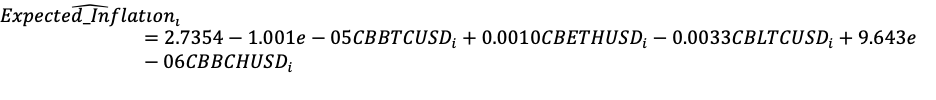


In [ ]:
residual = reg.resid #calculates the residuals e for the data
res = pd.DataFrame(residual, columns = ["Residual"])
res["Date"] = FredCryptoDF.DATE
res

In [ ]:
residual_plot = px.line(res, x = "Date", y = "Residual")
residual_plot.show()

Yhat as shown in equation 1.2 represents the estimated expected inflation values based on the residuals from the OLS model. 

In [ ]:
Yhat = reg.fittedvalues 
Yhat_df = pd.DataFrame(Yhat, columns = ["Predicted Inflation"])
Yhat_df["Residual"] = res.Residual
Yhat_df["Date"] = FredCryptoDF.DATE
Yhat_df["Actual Inflation"] = FredCryptoDF.Expected_Inflation
Yhat_df

Here we plot both the predicted and the actual inflation values to ensure that the predicted model is a good fit for the actual data. 

In [ ]:
residual_plot = px.line(Yhat_df, x="Date", y = ["Predicted Inflation", "Actual Inflation"])
residual_plot.show()

### Comparing the Model Data Against the Real Data 

This graph shows how the change in expected inflation and cryptocurrencies' closing prices correlate. The graph seems to demonstrate that even slight increases in expected inflation correspond to result in a disproportionately large change in the prices of many cryptocurrencies. 

In [ ]:
FredCryptoPlot = px.line(FredCryptoDF, x = "DATE", y = ["Expected_Inflation", "CBBTCUSD", "CBETHUSD", "CBLTCUSD", "CBBCHUSD"], title = "Visulizing the Movements Each Cryptocurrency & Expected Inflation")           
FredCryptoPlot.show()

## Summary of initial analysis

From the initial exploratory visuals, it was clear that there were some interesting relationships between cryptocurrency prices and expected inflation rates. The OLS linear regression further supports this finding and suggests that the demand for cryptocurrencies increases when there are widespread public fears of rising inflation. More formally we can generalize the model of attractiveness of cryptocurrencies to investors as: $p^{{\beta}}_{i} = {\beta}_{0} + {\beta}_{1}{\alpha}_{i} + {\epsilon}_{i}$

## ARIMA

Although the OLS model is a very powerful tool it is weakened when the model does not follow all seven classical assumptions. The time series model does not specifically address the autocorrelation problem which would likely violate the Gauss-Markov theorem for making the OLS the best unbiased linear estimator. To address this an autoregressive integrated moving average algorithm might be useful in developing an even stronger forecasting algorithm. This model is preferred in time series as it uses the previous values from the time series to predict the future values. In other words, ARIMA models use the lag from their own data and the lag from forecasted errors to predict future values.

The auto regressive **(AR)** part of the model can be described by the follwoing equation: $Y_{t} = {\alpha}+{\beta}_{1}Y_{t-1} + {\beta}_{2}Y_{t-2} + ... + {\beta}_{p}Y_{t-p} + {\epsilon}_{1}$ (2.1)


The moving average **(MA)** part of the model can be described by the follwoing equation: $Y_{t} = {\alpha} + {\epsilon}_{t} +{\phi}_{1}{\epsilon}_{t-1} + {\phi}_{2}{\epsilon}_{t-2} + ... + {\phi}_{q}{\epsilon}_{t-q}$ (2.2)


Combined this yeilds the **(ARIMA)** model: $Y_{t} = {\alpha}+{\beta}_{1}Y_{t-1} + {\beta}_{2}Y_{t-2} + ... + {\beta}_{p}Y_{t-p} + {\epsilon}_{1} + {\phi}_{1}{\epsilon}_{t-1} + {\phi}_{2}{\epsilon}_{t-2} + ... + {\phi}_{q}{\epsilon}_{t-q}$ (2.3)


There are 3 terms in the ARIMA model (p, d, q):

- d is the number of differences required to make the time series stationary

- p is the order of the AR term

- q is the order of the MA term

## Stationary VS Non-Stationary

The first step is to calculate the number of differencing operations required to make the time series data stationary. This will be done using the Augmented Dicky Fuller Test(ADF). 

Let $H_{0}: $ $d { \neq } 0$ in other words, the time series is non-stationary 
Then it follows that $H_{{\alpha}}: $ $d = 0$ in other words, the time series is stationary 

This test will reject the null if p-value < 0.05 in which case there is no need to find an order of differencing. If the p-value is > 0.05 then we would fail to reject the null and the series will require differencing operations to be performed until the time series is stationary. 

In [ ]:
# method to test if the time series data is stationary
def ADF_Test(data):
    adf_test = adfuller(data, autolag = "AIC")
    print(f"ADF: {adf_test[0]}")
    print(f"p-value: {adf_test[1]}")
    print(f"Number of Lag: {adf_test[2]}")
    print(f"Number of Observations: {adf_test[3]}")
    print(f"Critical Values:")
    for percent, item in adf_test[4].items():
        print("\t", percent, ": ", item)
        
ADF_Test(FredCryptoDF.CBBTCUSD)
ADF_Test(FredCryptoDF.CBBCHUSD)
ADF_Test(FredCryptoDF.CBETHUSD)
ADF_Test(FredCryptoDF.CBLTCUSD)

### Interpreting ADF-Test Results

Note that the p-values for the first 3 cryptocurrencies are all very high, above 0.05. Additionally, the majority of the critical values are less than the values of their respective Augmented Dicky Fuller test statistic. As a result, we cannot reject the null hypothesis, which leaves us to conclude that the time series data is not stationary. 

Intuitively, this makes sense in the context of cryptocurrencies prices and expected inflation rates. This is because changes in crypto prices and inflation expectations are generally speaking the result of mean independent increments that occur to daily economic shocks. These movements in prices depend on the previous price. One method of dealing with this issue is to model the returns of the crypto prices instead of the prices. While daily prices $X_{t}$ are generally non stationary while the daily returns $Y_{t} = \frac{X_{t} - X_{t-1}}{X_{t-1}}$ are generally stationary. To confirm the assumption that price movements are non-stationary we can look at the generalized daily price movements function. $X_{t} = X_{t-1} + {\epsilon}_{t} = X_{t-2} + {\epsilon}_{t-1} + {\epsilon}_{t} + X_{t-3} + {\epsilon}_{t-2} + {\epsilon}_{t} + ... + $ by repeated substitution yeilds: $\sum_{{\tau}=0}^{t} {\epsilon_{\tau}}$ which by definition is a linear stochastic process that has a unit root of 1 which describes a non stationary process. While taking the percent change is a good method to remove this effect another method is to take the log difference of the function. Applying the log difference to the function is useful as logarithms are time-invariant and will help to stabilize the variance. Taking the first order of difference of this function can be used to obtain the required stationary data. 

Since the initial ordinary least squares regression model showed that Bitcoin and Ethereum are most likely to have a strong correlation with the expected inflation rates, we will focus our efforts on making those data sets stationery

## Making Timeseries Data Stationary 

D is the number of differences required to make the time series stationary. This will be done by ploting the Autocorrelation Function (ACF) and performing the order of difference operation on the data untill the data becomes stationary. 

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(FredCryptoDF.CBBTCUSD)
ax1.set_title("Original Bitcoin Data")
plot_acf(FredCryptoDF.CBBTCUSD, ax = ax2);



In [ ]:
diff = FredCryptoDF.CBBTCUSD.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 4))

ax1.plot(diff)
ax1.set_title("Difference Once Bitcoin")
plot_acf(diff, ax = ax2);

### Interpreting the Bitcoin Timeseries Data
In the first plot, we can see that there is clear movement of the Bitcoin closing prices over time. Additionally, we see severe autocorrelation for the initial data. The second plot shows the first-order difference of the Bitcoin data. Here we can instantly see that the data is much more stationary than before and the autocorrelation is for the most part in an acceptable range. From these graphs, we can conclude that the value of d, the order of differences required to make the time series stationary in the ARIMA model, is 1 for the first-order difference of the Bitcoin data. 

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(FredCryptoDF.CBETHUSD)
ax1.set_title("Original Ethereum Data")
plot_acf(FredCryptoDF.CBETHUSD, ax = ax2);

In [ ]:
diff = FredCryptoDF.CBETHUSD.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 4))

ax1.plot(diff)
ax1.set_title("Difference Once Ethereum")
plot_acf(diff, ax = ax2);

In [ ]:
diff = FredCryptoDF.CBETHUSD.diff().diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 4))

ax1.plot(diff)
ax1.set_title("Difference Twice Ethereum")
plot_acf(diff, ax = ax2);


### Interpreting the Timeseries Ethereum Data
In the first plot, we can see that the Ethereum closing prices are clearly moving in an upwards direction over time and is thus non-stationary. Additionally, we see severe autocorrelation for the initial data. The second plot shows the first-order difference of the Ethereum data. Here the data is much more stationary than before and the autocorrelation is less severe. The third plot shows the second-order difference for the Ethereum data. When compared with the first-order difference we see that the first-order difference is a better fit. From these graphs, we can conclude that the value of d should be 1 for the first-order difference of the Ethereum data.

## Determining P (Auto Regressive Term)
P is the number of lags to be used in the ARIMA model. This can be determined by creating a Partial Autocorrelation Plot (PACF Plot). Here the partial autocorrelation represents the correlation between the time-series data and its lags. 

In [ ]:
diff = FredCryptoDF.CBETHUSD.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 4))

ax1.plot(diff)
ax1.set_title("Difference Once Bitcoin")
ax2.set_ylim(0, 1)
plot_pacf(diff, ax = ax2);

In [ ]:
diff = FredCryptoDF.CBETHUSD.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 4))

ax1.plot(diff)
ax1.set_title("Difference Once Ethereum")
ax2.set_ylim(0, 1)
plot_pacf(diff, ax = ax2);

### Interperting Autoregressive Term
From both PACF plots it is clear that the first term in the data that displays significant lag is point 6. Thus the q value for the AMIRA model for both Bitcoin and Ethereum is 6. 

## Determining Q (Moving Average Term)
Q is the order of the moving average term to be used in the ARIMA model. This refers to the number of lagged forecast errors that should be taken into account in the model. The ACF plot will show the number of lags to consider.

In [ ]:
diff = FredCryptoDF.CBBTCUSD.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 4))

ax1.plot(diff)
ax2.set_ylim(0, 1)
ax1.set_title("Difference Once Bitcoin")
plot_acf(diff, ax = ax2);

In [ ]:
diff = FredCryptoDF.CBETHUSD.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 4))

ax1.plot(diff)
ax1.set_title("Difference Once Ethereum")
ax2.set_ylim(0, 1)
plot_acf(diff, ax = ax2);

### Interperting Moving Average Term
From the plots above, we can determine that number of lagged forecast errors for Bitcoin is 4 and the number of errors for Ethereum is 3. 

## Fitting the ARIMA Model For Bitcoin and Ethereum

### Bitcoin ARIMA Price Forecast

In [ ]:
model = ARIMA(FredCryptoDF.CBBTCUSD, order = (6,1,4)) #ARIMA model for Bitcoin
result_BTC = model.fit(disp = 0)
print(result_BTC.summary())

The model above shows the results from the ARIMA model on the Bitcoin data. The plots below show that the data is indeed stationary, and the data is distributed around the mean which confirms the stationary nature of the data. 

In [ ]:
residuals_BTC = pd.DataFrame(result_BTC.resid)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 4))
ax1.plot(residuals_BTC)
ax2.hist(residuals_BTC, density = True)


### Plot Bitcoin Price Forcast
Based on the results from the Bitcoin ARIMA model we can now plot the forecasted model against the actual closing price movements. The ARIMA model shows a much greater fit then the original OLS model that was used before. 

In [ ]:
fig = result_BTC.plot_predict(start = 1, end = 1423, dynamic = False);
plt.title("Plot of Forecasted and Real Bitcoin Prices between 2017-12-21 and 2021-10-26")
plt.xlabel("Date") # 1 = 2017-12-21   200 = 2019-01-29  800 = 2020-03-04   1200 = 2021-04-09   1400 = 2021-10-26
plt.ylabel("Close Price")
plt.show()
print(f"date 1 is: {FredCryptoDF.DATE[1]}")
print(f"date 200 is: {FredCryptoDF.DATE[200]}")
print(f"date 400 is: {FredCryptoDF.DATE[400]}")
print(f"date 600 is: {FredCryptoDF.DATE[600]}")
print(f"date 800 is: {FredCryptoDF.DATE[800]}")
print(f"date 1000 is: {FredCryptoDF.DATE[1000]}")
print(f"date 1200 is: {FredCryptoDF.DATE[1200]}")
print(f"date 1400 is: {FredCryptoDF.DATE[1400]}")

### Ethereum ARIMA Price Forecast

In [ ]:
model = ARIMA(FredCryptoDF.CBETHUSD, order = (6,1,3)) #ARIMA model for Ethereum
result_ETH = model.fit(disp = 0)
print(result_ETH.summary())

In [ ]:
residuals_ETH = pd.DataFrame(result_ETH.resid)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 4))
ax1.plot(residuals_ETH)
ax2.hist(residuals_ETH, density = True)

In [ ]:
fig = result_ETH.plot_predict(start = 1, end = 1423, dynamic = False);
plt.title("Plot of Forecasted and Real Ethereum Prices between 2017-12-21 and 2021-10-26")
plt.xlabel("Date") # 1 = 2017-12-21   200 = 2019-01-29  800 = 2020-03-04   1200 = 2021-04-09   1400 = 2021-10-26
plt.ylabel("Close Price")
plt.show()
print(f"date 1 is: {FredCryptoDF.DATE[1]}")
print(f"date 200 is: {FredCryptoDF.DATE[200]}")
print(f"date 400 is: {FredCryptoDF.DATE[400]}")
print(f"date 600 is: {FredCryptoDF.DATE[600]}")
print(f"date 800 is: {FredCryptoDF.DATE[800]}")
print(f"date 1000 is: {FredCryptoDF.DATE[1000]}")
print(f"date 1200 is: {FredCryptoDF.DATE[1200]}")
print(f"date 1400 is: {FredCryptoDF.DATE[1400]}")

### Plot Ethereum Price Forcast
Based on the results from the Ethereum ARIMA model we can now plot the forecasted model against the actual closing price movements. From this visual, we can observe that the ARIMA model is a good fit for the real Ethereum data over this time period. This type of model might be useful to crypto investors in making their predictions on how the price of the cryptocurrency will move over time to optimize their strategy. 

To predict the next n samples of Ethereum prices we can use the .forcast(steps = n) method which will return an array of the next n predictions of Ethereum closing prices based off the ARIMA model.

In [ ]:
result_ETH.forecast(steps = 100)[0]

# Summary of Project Results

The goal of the project was to determine if there was any validity to the argument that cryptocurrency prices are correlated with inflation rates. To establish if there was a relationship between cryptocurrency prices and expected inflation rates a Pearson correlation and an Ordinary Least Squares regression were performed on expected inflation rates and the closing prices of four different cryptocurrency prices. The results from the initial analysis seem to confirm that a linear relationship between the prices of cryptocurrencies and inflation rates is positively correlated. In other words, as the prices of cryptocurrencies increase the models suggest that the public's expected inflation rate also increases. After discovering this relationship, the next objective of the project was to determine if there was any useful method of determining if an investor could determine the future prices of various cryptocurrencies. There are many issues with attempting to predict future prices in a time-series model. These issues are addressed by using an autoregressive moving average that will make the time-series data stationary and use the model's estimated forecast errors to improve the model. This model was done on Bitcoin and Ethereum data to determine if investors could generate some level of alpha, some statistical edge, to predict the future prices of these two cryptocurrencies. The results from these tests suggest that the generated model is a good fit for the current data and is likely useful for investors to be used in their analysis when attempting to determine how to hedge their investments regarding cryptocurrencies. 

https://quant.stackexchange.com/questions/16481/why-do-we-usually-model-returns-and-not-prices
https://quant.stackexchange.com/questions/4160/discrete-returns-versus-log-returns-of-assets
https://www.emerald.com/insight/content/doi/10.1108/SEF-09-2012-0106/full/html
https://stats.stackexchange.com/questions/465514/why-prices-are-usually-not-stationary-but-returns-are-more-likely-to-be-station
https://en.wikipedia.org/wiki/Unit_root
https://otexts.com/fpp2/stationarity.html
https://blog.quantinsti.com/stationarity/
https://link.springer.com/article/10.1007/s00521-020-05129-6
https://www.semanticscholar.org/paper/Time-series-forecast-in-non-stationary-environment-Garbacz/f79fb84f5001dafe120c68ae7379f92907566511
https://www.semanticscholar.org/paper/Time-series-forecast-in-non-stationary-environment-Garbacz/f79fb84f5001dafe120c68ae7379f92907566511

https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test
https://en.wikipedia.org/wiki/Pearson_correlation_coefficient
https://en.wikipedia.org/wiki/Ordinary_least_squares
https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average